# Anirudh Swaminathan-220968280-DSE A2
## exercise1-week8 clustering using Online Retail.xlsx

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.DataFrame()
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df
df = df[df['UnitPrice'] >= 0]
df['Quantity']=df['Quantity'].abs()

### Read and write a summary of the metadata

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541907.000000,541907.000000,406829.000000
mean,11.340525,4.651957,15287.690570
std,217.995883,94.395447,1713.600303
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], infer_datetime_format=True)

In [6]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Select only the transactions that have occurred from 01/04/ 2011 and 09/12/2011 and create a dataset.

In [7]:
df2 = pd.DataFrame()
df2 = df[(df["InvoiceDate"]>"2011-04-01") & (df["InvoiceDate"]<"2011-12-09")]

### Calculate the RFM values for each customer (by customer id). RFM

In [8]:
df2["R"] = 12 - df2["InvoiceDate"].dt.month
df2["TotalCost"] = df2["UnitPrice"]*df2["Quantity"]

C:\Users\mca\AppData\Local\Temp\ipykernel_14716\3285051053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["R"] = 12 - df2["InvoiceDate"].dt.month
C:\Users\mca\AppData\Local\Temp\ipykernel_14716\3285051053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["TotalCost"] = df2["UnitPrice"]*df2["Quantity"]


In [15]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,R,TotalCost
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,8,16.50
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom,8,19.80
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom,8,10.20
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom,8,19.90
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom,8,15.30
...,...,...,...,...,...,...,...,...,...,...
540272,581474,21253,SET OF PICTURE FRAME STICKERS,1,2011-12-08 20:01:00,0.79,12748.0,United Kingdom,0,0.79
540273,581474,22108,PING! MICROWAVE PLATE,1,2011-12-08 20:01:00,1.25,12748.0,United Kingdom,0,1.25
540274,581474,22167,OVAL WALL MIRROR DIAMANTE,1,2011-12-08 20:01:00,9.95,12748.0,United Kingdom,0,9.95
540275,581474,21929,JUMBO BAG PINK VINTAGE PAISLEY,1,2011-12-08 20:01:00,2.08,12748.0,United Kingdom,0,2.08


In [16]:
df3=df2[["CustomerID","R","TotalCost"]]
F=[]
R=[]
M=[]
for x in df2["CustomerID"].unique():
    F.append(len(df2[df2["CustomerID"]==x]))
    if len(list(df2[df2["CustomerID"]==x]["R"].unique()))==0:
        R.append(0)
    else:
        R.append(list(df2[df2["CustomerID"]==x]["R"].unique())[-1])
    M.append(df2[df2["CustomerID"]==x]["TotalCost"].sum())
df3=df3.dropna(axis=0,subset=["CustomerID"])

final=pd.DataFrame({"CustomerID":df2["CustomerID"].unique(),"F":F,"R":R,"M":M})
final.dropna(axis=0,inplace=True)
final.isna().sum()

CustomerID    0
F             0
R             0
M             0
dtype: int64

In [17]:
final

,CustomerID,F,R,M
0,18161.0,66,1,1323.06
1,14886.0,18,8,364.80
2,17613.0,230,1,3218.31
3,12523.0,87,0,1472.53
4,13694.0,384,0,48554.76
...,...,...,...,...
3870,17830.0,7,0,111.05
3871,13298.0,2,0,360.00
3872,16833.0,15,0,435.24
3873,14569.0,12,0,227.39


### Use the elbow method to identify how many customer segments exist, using the RFM

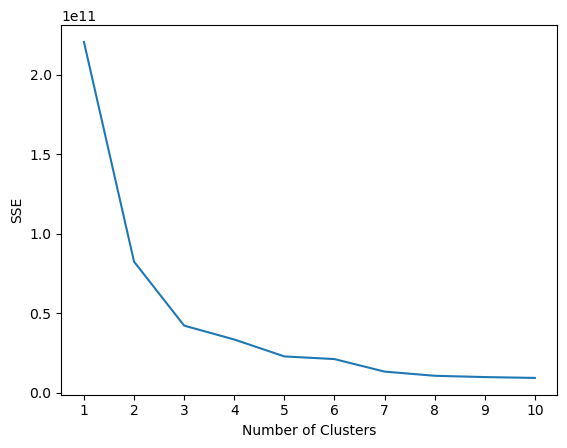

In [18]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(final)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Create the customer segments with K-means algorithm by using number of clusters is suggested by elbow method.

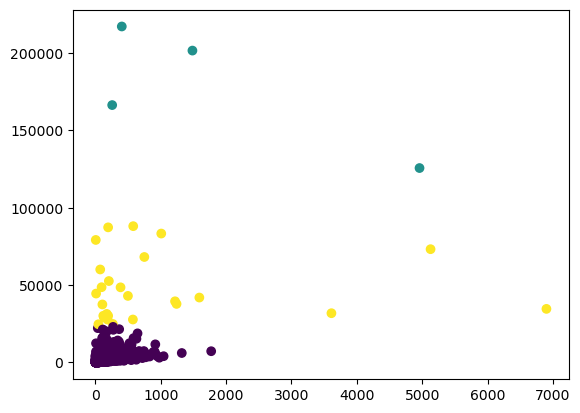

In [19]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)
kmeans.fit(final)
final["cluster"]=kmeans.labels_
final
plt.scatter(x=final["F"],y=final["M"],c=final["cluster"])

In [20]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc

In [21]:
finalv2 = final.drop('CustomerID', axis = 1)

### Visualize the clusters using the dendrogram.

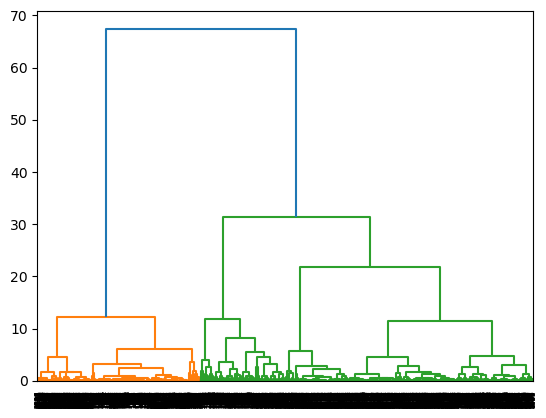

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(finalv2)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)
pca = PCA(n_components = 3)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['R', 'F',"M"]
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

### Compare the clusters obtained using KMeans vs. Agglomeration

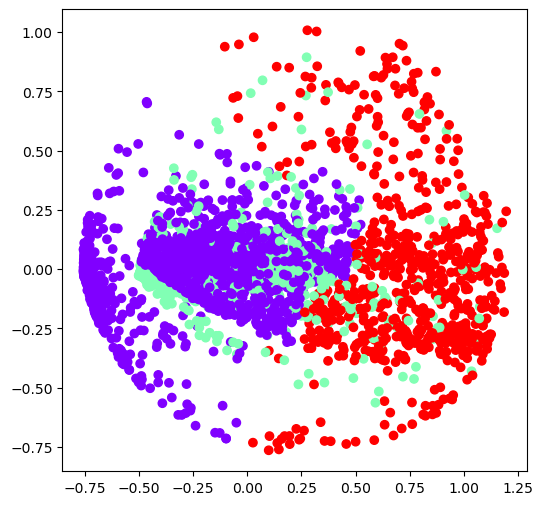

In [23]:
ac3 = AgglomerativeClustering(n_clusters = 3)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['F'], X_principal['M'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()